In [1]:
# importing libraries

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [2]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = 'Datasets/train'
valid_path = 'Datasets/test'


In [3]:
# Importing Resnet50 library
# Here we will be using imagenet weights

resnet = ResNet50(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)




94781440/94765736 [==============================] - 14s 0us/step


In [4]:
# To not train using existing weights
for layer in resnet.layers:
    layer.trainable = False

In [5]:
  # useful for getting number of output classes
folders = glob('Datasets/train/*')

In [6]:
# our layers - you can add more if you want
x = Flatten()(resnet.output)

In [7]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=resnet.input, outputs=prediction)

In [8]:

model.summary()


Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
______________________________________________________________________________________________

In [9]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


In [10]:
# Image Data Generator to import the images from the dataset and Data Augmentation on Train Data
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [11]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('Datasets/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 64 images belonging to 3 classes.


In [12]:
test_set = test_datagen.flow_from_directory('Datasets/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 58 images belonging to 3 classes.


In [13]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=50,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

E:\Anconda\lib\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/50
2/2 [==============================] - 15s 6s/step - loss: 6.0980 - accuracy: 0.3125 - val_loss: 3.7497 - val_accuracy: 0.5345
Epoch 2/50
2/2 [==============================] - 6s 4s/step - loss: 6.3259 - accuracy: 0.4062 - val_loss: 3.4865 - val_accuracy: 0.3276
Epoch 3/50
2/2 [==============================] - 7s 5s/step - loss: 3.2320 - accuracy: 0.4375 - val_loss: 6.1123 - val_accuracy: 0.1552
Epoch 4/50
2/2 [==============================] - 6s 5s/step - loss: 3.6433 - accuracy: 0.3594 - val_loss: 1.1563 - val_accuracy: 0.5517
Epoch 5/50
2/2 [==============================] - 6s 4s/step - loss: 1.3148 - accuracy: 0.4375 - val_loss: 1.9713 - val_accuracy: 0.3966
Epoch 6/50
2/2 [==============================] - 6s 4s/step - loss: 2.3423 - accuracy: 0.4531 - val_loss: 1.1508 - val_accuracy: 0.5690
Epoch 7/50
2/2 [==============================] - 6s 4s/step - loss: 0.8053 - accuracy: 0.6406 - val_loss: 2.1738 - val_accuracy: 0.1897
Epoch 8/50
2/2 [========================

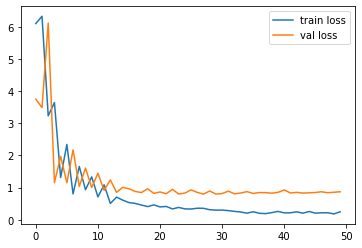

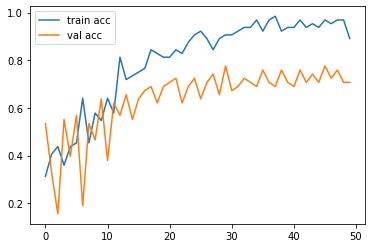

<Figure size 432x288 with 0 Axes>

In [14]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [15]:
# save it as a h5 file


from tensorflow.keras.models import load_model

model.save('model_resnet50.h5')

E:\Anconda\lib\site-packages\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


In [16]:

y_pred = model.predict(test_set)


In [17]:
y_pred

array([[1.06118083e-01, 8.70549798e-01, 2.33320948e-02],
       [2.09821779e-02, 9.53601897e-01, 2.54159681e-02],
       [5.29406309e-01, 3.66368368e-02, 4.33956891e-01],
       [4.38655280e-02, 3.55338782e-01, 6.00795746e-01],
       [1.78759929e-05, 3.39009246e-04, 9.99643087e-01],
       [2.94255577e-02, 8.40362847e-01, 1.30211547e-01],
       [4.22424264e-02, 1.82112366e-01, 7.75645256e-01],
       [2.77054925e-02, 9.70639050e-01, 1.65549107e-03],
       [8.80189613e-02, 3.64030749e-01, 5.47950327e-01],
       [8.63511562e-01, 1.32819027e-01, 3.66945309e-03],
       [1.01766065e-02, 9.17960048e-01, 7.18633607e-02],
       [4.78249043e-02, 8.96983221e-03, 9.43205237e-01],
       [9.23237503e-01, 3.83083709e-02, 3.84540893e-02],
       [2.01579789e-03, 9.56779242e-01, 4.12048548e-02],
       [4.25662063e-02, 8.91613305e-01, 6.58205077e-02],
       [3.05762305e-03, 9.87841547e-01, 9.10085253e-03],
       [4.05409671e-02, 6.64359033e-01, 2.95100003e-01],
       [9.09229457e-01, 5.41117

In [18]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [19]:
y_pred

array([1, 1, 0, 2, 2, 1, 2, 1, 2, 0, 1, 2, 0, 1, 1, 1, 1, 0, 2, 1, 2, 1,
       0, 2, 2, 2, 2, 2, 1, 0, 2, 1, 1, 0, 2, 1, 2, 1, 1, 1, 1, 2, 1, 0,
       2, 2, 0, 2, 2, 1, 2, 1, 1, 2, 1, 2, 2, 1], dtype=int64)

In [21]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [22]:
model=load_model('model_resnet50.h5')

In [24]:
img=image.load_img('Datasets/Test/lamborghini/11.jpg',target_size=(224,224))



In [25]:
x=image.img_to_array(img)
x

array([[[252., 252., 252.],
        [252., 252., 252.],
        [252., 252., 252.],
        ...,
        [196., 187., 172.],
        [217., 208., 193.],
        [243., 234., 219.]],

       [[252., 252., 252.],
        [252., 252., 252.],
        [252., 252., 252.],
        ...,
        [245., 245., 237.],
        [243., 243., 235.],
        [242., 242., 234.]],

       [[252., 252., 252.],
        [252., 252., 252.],
        [252., 252., 252.],
        ...,
        [240., 249., 248.],
        [242., 251., 250.],
        [242., 251., 250.]],

       ...,

       [[189., 207., 229.],
        [190., 206., 229.],
        [190., 206., 229.],
        ...,
        [171., 180., 187.],
        [171., 180., 187.],
        [171., 180., 187.]],

       [[185., 206., 227.],
        [185., 206., 227.],
        [185., 206., 227.],
        ...,
        [171., 180., 187.],
        [171., 180., 187.],
        [171., 180., 187.]],

       [[185., 206., 227.],
        [185., 206., 227.],
        [185., 2

In [26]:
x.shape

(224, 224, 3)

In [27]:
x=x/255

In [28]:
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [29]:
model.predict(img_data)

array([[0.42069566, 0.043684  , 0.53562033]], dtype=float32)

In [30]:
a=np.argmax(model.predict(img_data), axis=1)

In [31]:
a==1

array([False])